In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the CSV and Perform Basic Data Cleaning

In [2]:
# Read in data
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
print(df["koi_disposition"].unique())

['CONFIRMED' 'FALSE POSITIVE' 'CANDIDATE']


In [4]:
df.shape

(6991, 41)

# Select features (columns)

In [5]:
# Set X equal to the entire data set, except for the first column
X = df.iloc[:,1:]

# Set y equal to the first column
y = df.iloc[:,0]

In [6]:
# Search for top 10 features according to feature importances
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_

array([0.12968848, 0.1627759 , 0.13216841, 0.04920233, 0.01690225,
       0.01287896, 0.01327508, 0.0145995 , 0.02236969, 0.02036605,
       0.01331812, 0.01229423, 0.01038391, 0.01808475, 0.02842174,
       0.02943007, 0.02128713, 0.012629  , 0.01311461, 0.0139546 ,
       0.01087924, 0.00928813, 0.01357645, 0.00918473, 0.00960459,
       0.00858564, 0.03625854, 0.00968763, 0.01040164, 0.02237929,
       0.01715084, 0.01035935, 0.01022018, 0.01416997, 0.00906448,
       0.01029915, 0.00923412, 0.01169194, 0.01029231, 0.01052696])

In [7]:
# Store the top 10 features as a series, using the column headers as the index
feat_imp = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
feat_imp

koi_fpflag_ss        0.162776
koi_fpflag_co        0.132168
koi_fpflag_nt        0.129688
koi_fpflag_ec        0.049202
koi_model_snr        0.036259
koi_duration_err2    0.029430
koi_duration_err1    0.028422
koi_steff_err1       0.022379
koi_time0bk_err1     0.022370
koi_depth            0.021287
dtype: float64

In [8]:
# Set features based on feature importances
X = df[feat_imp.index]

# Use koi_disposition for y values
y = df['koi_disposition']

# Create a Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Find Best K

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Loop through to find the best k value
for k in range (5, 35, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train: {train_score:.3f}, Test: {test_score:.3f}")

k: 5, Train: 0.894, Test: 0.852
k: 8, Train: 0.883, Test: 0.846
k: 11, Train: 0.879, Test: 0.844
k: 14, Train: 0.877, Test: 0.844
k: 17, Train: 0.876, Test: 0.847
k: 20, Train: 0.872, Test: 0.851
k: 23, Train: 0.871, Test: 0.846
k: 26, Train: 0.871, Test: 0.844
k: 29, Train: 0.868, Test: 0.849
k: 32, Train: 0.866, Test: 0.848


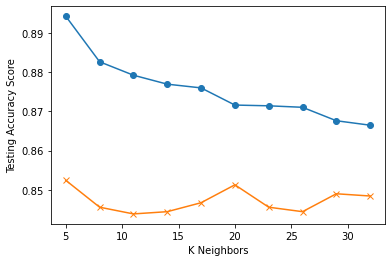

In [12]:
# Plot training and testing scores
plt.plot(range(5, 35, 3), train_scores, marker='o')
plt.plot(range(5, 35, 3), test_scores, marker='x')
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

# Current best k value looks like k=17

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
from sklearn.model_selection import GridSearchCV

# Initialize new classifer outside of loop
knn2 = KNeighborsClassifier()

# Create the GridSearchCV model
param_grid = dict(n_neighbors=list(range(5, 55)))

best_model = GridSearchCV(knn2, param_grid, cv=100, scoring='accuracy', verbose=1)

In [14]:
# Train the model with GridSearch
best_model.fit(X_train_scaled, y_train)

Fitting 100 folds for each of 50 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  2.3min finished


GridSearchCV(cv=100, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29, 30, 31, 32, 33, 34, ...]},
             scoring='accuracy', verbose=1)

In [15]:
print(best_model.best_params_)
print(best_model.best_score_)

{'n_neighbors': 42}
0.8620827285921626


In [16]:
# Make predictions
grid_predictions = best_model.predict(X_test_scaled)
df_grid = pd.DataFrame({"Actual":y_test, "Predicted":grid_predictions})
df_grid.head()

,Actual,Predicted
5130,FALSE POSITIVE,FALSE POSITIVE
1960,CANDIDATE,CONFIRMED
578,CONFIRMED,CONFIRMED
5703,FALSE POSITIVE,FALSE POSITIVE
3427,CANDIDATE,CANDIDATE


In [17]:
# Score the model
best_model.score(X_test_scaled, y_test)

0.8535469107551488